In [1]:
import numpy as np
from flann import FLANN
from datasets import *
import time
import matplotlib.pyplot as plt
from lshash import LSHashing

In [2]:
datasets_pathes = [ "mnist.hdf5", "sift.hdf5"]

In [10]:
def build_time_consumption(algo, X_train):
    t0 = time.time()
    try:
        tree = algo.fit(X_train, algorithm="kdtree")
    except:
        tree = algo.fit(X_train, hash_size=32, n_hashtables=12)
    total = time.time() - t0
    print(algo.name + " fitting time:" + str(total) + " seconds")
    return total

In [4]:
def predict_time_consumption(algo, X_test, n):
    results = []
    total_time = 0
    times = []
    for x in X_test:
        t0 = time.time()
        tmp = algo.predict(x, n)
        t_tmp = (time.time() - t0)
        total_time += t_tmp
        times.append(t_tmp)
        
    average_time =  total_time / len(X_test)
    print(algo.name + " total time:" + str(total_time) + " seconds")
    print(algo.name + " average time:" + str(average_time) + " seconds")
    plt.title("Distribution of execution time")
    plt.hist(times, bins = 5, range=(min(times),max(times)), log=True)
    plt.xlabel("Time (sec)")
    plt.ylabel("Number of executions")
    plt.show()
    return total_time, average_time

In [5]:
def time_metrics(algo, X_train, X_test, n):
    build_time_consumption(algo, X_train)
    predict_time_consumption(algo, X_test, n)

In [6]:
def accuracy(algo, X_test, neighbors, n):
    results = [ algo.predict(x,n) for x in X_test]
    acc = 0.0
    for idx, res in enumerate(results):
        if res in neighbors[idx]:
            acc += 1.0
    acc /= len(X_test)
    print("Accuracy: " + str(acc))

In [7]:
def analyse_algo(algo, dataset_fp, n):
    X_train, X_test, neighbors = get_dataset(dataset_fp)
    time_metrics(algo, X_train, X_test, n=1)
    accuracy(algo, X_test, neighbors, n)

Dataset mnist.hdf5
FLANN fitting time:0.39032721519470215 seconds
FLANN total time:1.1974296569824219 seconds
FLANN average time:0.00011974296569824219 seconds


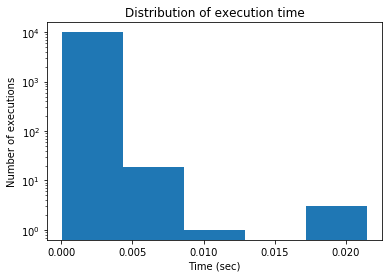

Accuracy: 0.9961
-------------------------------------------------------
Dataset sift.hdf5
FLANN fitting time:2.9460976123809814 seconds
FLANN total time:1.2870080471038818 seconds
FLANN average time:0.00012870080471038818 seconds


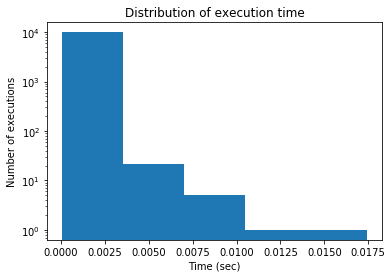

Accuracy: 0.9448
-------------------------------------------------------


In [8]:
for d in datasets_pathes:
    print("Dataset " + d)
    analyse_algo(FLANN(), d, 1)
    print("-------------------------------------------------------")

Dataset mnist.hdf5
LSHashing fitting time:28.16188359260559 seconds
LSHashing total time:11.588940858840942 seconds
LSHashing average time:0.0011588940858840943 seconds


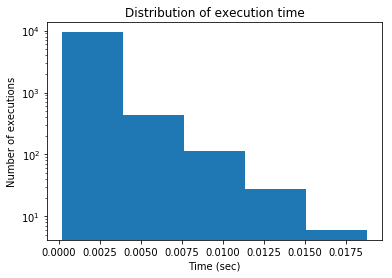

/home/kateryna/anaconda3/envs/algo_project/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


Accuracy: 0.6337
-------------------------------------------------------
Dataset sift.hdf5
LSHashing fitting time:380.0071756839752 seconds
LSHashing total time:122.90084528923035 seconds
LSHashing average time:0.012290084528923035 seconds


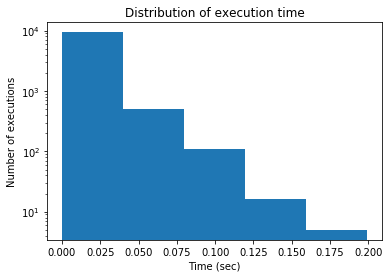

Accuracy: 0.9294
-------------------------------------------------------


In [12]:
for d in datasets_pathes:
    print("Dataset " + d)
    analyse_algo(LSHashing(), d, 1)
    print("-------------------------------------------------------")